# Практическая работа №1: Краевая задача для уравнения II-го порядка.

Герасев Георгий, гр 9382, вариант 3.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения
### Задача Коши
Система n ОДУ первого порядка:
$
\begin{cases}
    y'_1=f_1(x,y_1,...,y_n) \\
    \dots \\
    y'_n=f_n(x,y_1,...,y_n) \\
    y_1(x_0)=y_{01} \\
    \dots \\
    y_n(x_0)=y_{0n} \\
\end{cases}
$

ОДУ n-го порядка:
$
\begin{cases}
    y^{(n)}=f(x,y,...,y^{(n-1)}) \\
    y(x_0)=y_{01} \\
    \dots \\
    y^{(n-1)}(x_0)=y_{0n} \\
\end{cases}
$

Решение задачи Коши состоит в нахождении решения (интеграла) дифференциального уравнения, удовлетворяющим начальным условиям.

### Краевая задача 
Задача о нахождении решения заданного дифференциального уравнения удовлетворяющего краевым условиям в концах интервала.


### Метод половинного деления
Метод заключается в нахождении корней нелинейного уравнения.
Уменьшается интервал до тех пор, пока результат не будет достаточно точным.
Уменьшается делением пополам, после чего значение сравнивается с целевым.
В зависимости от тог

## Постановка задачи

Дано дифференциальное уравнение:
$y''=f(x,y), a < x < b$ $\space\space\space(1)$

и граничные условия

$y(a) = y_a, y(b) = y_b$    $\space\space\space(2)$

Требуется найти решение задачи (1)-(2) и построить его график.

Рассмотрим задачу Коши для уравнения (1) с начальными условиями 

$y(a) = y_a, y'(a) = h$     $\space\space\space(3)$

План решения основан на многократном решении задачи Коши (1),(3).

Задача сводится к нахождению такого значения переменной h, при которой выполнено условие на правом конце отрезка, т.е. должно выполняться

$y(b,h) = y_b$





## Выполнение работы

Имеем дифференциальное уравнение:

$y'' = cos(x) + y^2$

Краевые значения:

$y(0) = 4$

$y(2) = -2$



Приведем к задаче Коши:

$
\begin{cases}
    y''=f(x,y) \\
    y(0)=4 \\
    y'(0)=h \\
\end{cases}
$

Разбиваем на две системы ОДУ первого порядка:

$
\begin{cases}
    y_1'=y_2 \\
    y_1(0) = 4 \\
    y_2' = cos(x) + y^2 \\
    y_2(0) = h \\
\end{cases}
$

Выбрали $h=-7.3$, получили приближение на конце отрезка сверху.

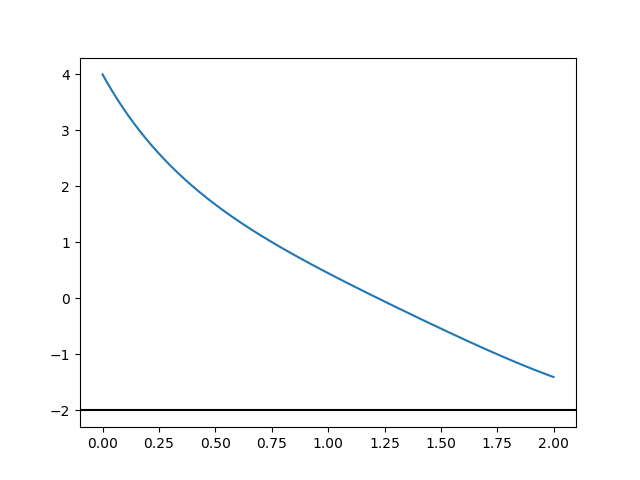

При h =  -7.3  f(2) =  -1.4032858464069875


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(Y,t):
    return [Y[1], np.cos(t)+(Y[0]**2)]

a = 0
b = 2

h = -7.3
a_y = 4
b_y_target = -2
a_t = np.arange(a, b, 0.001)
solution = odeint(f, [a_y,h], a_t)
solution_upper = solution
plt.axhline(y=-2, color='black', linestyle='-')
plt.rcParams["figure.figsize"] = (20,20)
plt.plot(a_t, solution[:,0])
plt.show()
print("При h = ", h, " f(2) = ", solution[-1,0])

Теперь найдем приближение снизу, будем идти с шагом 0.01, до тех пор, пока значение функции не будет меньше 2.

Для интервала h: [ -7.599999999999999 , -7.3 ] значения функции f равны: [ -2.1770858722226616 , -1.4032858464069875 ]


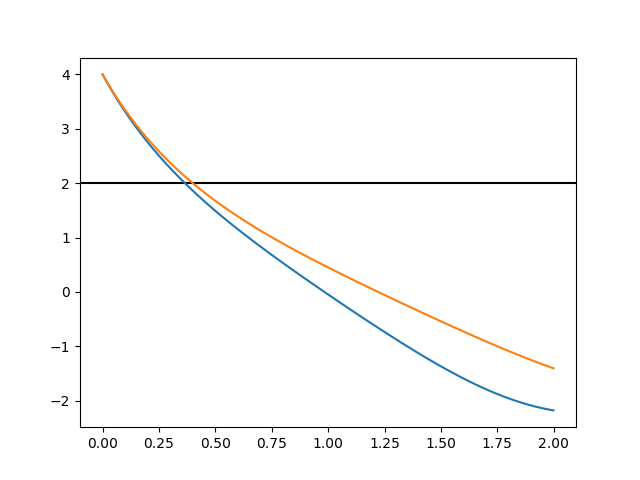

In [56]:
upper_h = h
upper_y = solution[-1,0]
current_y = solution[-1,0]
dh = 0.1
while current_y > b_y_target:
    h = h - dh
    solution = odeint(f, [a_y,h], a_t)
    current_y = solution[-1,0]
solution_lower = solution
lower_h = h
lower_y = solution[-1,0]
print("Для интервала h: [",lower_h,",",upper_h,"]", "значения функции f равны: [",lower_y,",", upper_y,"]")
plt.axhline(y=2, color='black', linestyle='-')
plt.plot(a_t, solution_lower[:,0])
plt.plot(a_t, solution_upper[:,0])
plt.show()

Для концов отрезка h: [ -7.599999999999999 , -7.3 ] значения функции f равны: [ -2.1770858722226616 , -1.4032858464069875 ]

Методом половинного деления приблизим h, чтобы отрезок по y был меньше 0.001.

Границы h:[-7.510058593749999,-7.509765624999999], в которых f: [-2.0001749898650267 ,-1.9995311076458586]
Среднее h от границ h = -7.509912109375


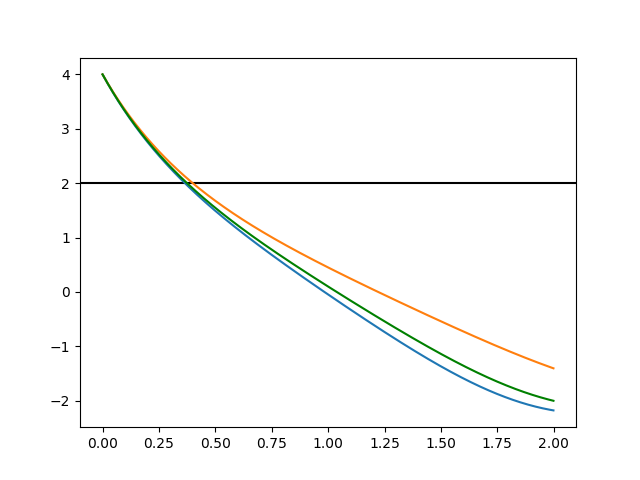

In [54]:
steps = 0
h_mid = 0
while abs(upper_y - lower_y) >= 0.001:
    steps += 1
    dh = (upper_h - lower_h)/2
    h_mid = lower_h + dh
    solution_mid = odeint(f, [a_y,h_mid], a_t)
    if(solution_mid[-1,0] > b_y_target):
        upper_h = h_mid
        upper_y = solution_mid[-1,0]
    else:
        lower_h = h_mid
        lower_y = solution_mid[-1,0]

h_mid = lower_h + (upper_h - lower_h)/2
        
print(f"Границы h:[{lower_h},{upper_h}], в которых f: [{lower_y} ,{upper_y}]")
print(f"Среднее h от границ h = {h_mid}")

plt.axhline(y=2, color='black', linestyle='-')
plt.plot(a_t, solution_lower[:,0])
plt.plot(a_t, solution_upper[:,0])
plt.plot(a_t, solution_mid[:,0], color="green")
plt.show()

Границы h:[-7.510058593749999,-7.509765624999999], в которых f: [-2.0001749898650267 ,-1.9995311076458586]
Среднее h от границ h = -7.509912109375


## Выводы

Была решена краевая задача для уравнения второго порядка путем многократного решения задачи Коши. Сначала ОДУ второго порядка было сведено к системе из двух ОДУ первого порядка. Сначала была решена задача "поимки" значения -2 в интервал. Затем сужением интервала значение h было уточнено.